<a href="https://colab.research.google.com/github/Shpchv/Python-for-DH/blob/main/HW_10_almost_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

In [ ]:
import spacy

In [ ]:
from nltk import download
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter

In [ ]:
main_link = 'https://opisanie-kartin.ru'

In [ ]:
r = requests.get(main_link)
soup = BeautifulSoup(r.text, 'html.parser')
url = [item.get('href') for item in soup.find_all('a')]
artist_url = [i for i in url if 'https://opisanie-kartin.ru/category/' in i]
len(artist_url)

134

In [ ]:
paint_links = []

for i in tqdm(artist_url):  
  r = requests.get(i)
  soup = BeautifulSoup(r.text, 'html.parser')
  for h2 in soup.find_all('h2'):
    for i in h2.contents:
      #print(i['href'])
      paint_links.append(i['href'])

100%|██████████| 134/134 [05:09<00:00,  2.31s/it]


In [ ]:
def get_picture_link_decription(paint_links):  
  
  r = requests.get(i)
  soup = BeautifulSoup(r.text, 'html.parser')
  desc_text = soup.find("div", {"class":"entry-content"}).text.replace('\n', '').replace('\xa0', ' ')
  name_line = soup.find(("h1", {"class":"entry-headline"}))
  name = str(name_line).split('«')[1][:-6]
  
  data = {}

  data['description'] = desc_text
  split_text = re.split('\s+', desc_text)
    #searching for metadata:
  year_search = re.search('Год написания картины: (.*?)\.', desc_text)
  data['year'] = year_search
  material_search = re.findall('Материал: (.*?)\.', desc_text)[0].replace('.', '')
  data['material'] = material_search
  size_search = re.findall('Размеры картины: (.*?см)', desc_text)
  data['size'] = size_search
  techniq_search = re.findall('Техника написания: (.*?)\.', desc_text)[0].replace('.', '')
  data['techniq'] = techniq_search
  genre_search = re.findall('Жанр: (.*?)\.', desc_text)[0].replace('.', '')
  data['genre'] = genre_search
  style_search = re.findall('Стиль: (.*?)\.', desc_text)[0].replace('.', '')
  data['style'] = style_search
  gallery_search = re.search('Галерея: (.*?)\.', desc_text)[0].replace('.', '')
  data['gallery'] = gallery_search
  data['name'] = name
    #print(data)
  return data

In [ ]:
data = []
for i in tqdm(paint_links[:100]): #put 100 because there wasn't enough time
  painting_data = get_picture_link_decription(paint_links)
  data.append(painting_data)

100%|██████████| 100/100 [03:45<00:00,  2.26s/it]


In [ ]:
df = pd.DataFrame(data)
df.head()

,description,year,material,size,techniq,genre,style,gallery,name
0,«Дивное море написал Айвазовский… И я удостоил...,1877,холст,[],масло,портрет,романтизм,Галерея: Всероссийский музей А,Прощание А.С. Пушкина с морем
1,Всю жизнь объектом неослабевающей любви для Ай...,1853,холст,[85 x 121 см],масло,маринаСтиль: романтизм,романтизм,Галерея: Феодосийская картинная галерея имени И,Море. Коктебель
2,Айвазовский писал море в любое время суток. Из...,1849,холст,[89 x 106 см],масло,маринаСтиль: романтизм,романтизм,"Галерея: Дворцы-музеи и парки Петродворца, Пет...",Буря на море ночью
3,В этой работе художник не просто точно передае...,1842,холст,[92 x 141 см],масло,пейзаж,романтизм,Галерея: картинная галерея им,Неаполитанский залив в лунном свете
4,"Будучи живописцем главного морского штаба, Айв...",1846,холст,[223 x 335 см],масло,марина,романтизм,"Галерея: Государственный Русский музей, Санкт-...",Петр I при Красной горке


In [ ]:
df['style']

0         романтизм
1         романтизм
2         романтизм
3         романтизм
4         романтизм
          ...      
95    импрессионизм
96          реализм
97          реализм
98          реализм
99        символизм
Name: style, Length: 100, dtype: object

In [ ]:
!python -m spacy download ru_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 873 kB/s 
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 7.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
nlp = spacy.load('ru_core_news_sm')

In [ ]:
download('stopwords')
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(some_text):
  parsed_text = nlp(some_text)
  lemmas = [token.lemma_ for token in parsed_text]
  lemmas_filtered = [lemma for lemma in lemmas if lemma not in stop_words]
  return(lemmas_filtered)

In [ ]:
df['norm_desc'] = df['description'].apply(preprocess_text)

In [ ]:
df.head()

,description,year,material,size,techniq,genre,style,gallery,name,norm_desc
0,«Дивное море написал Айвазовский… И я удостоил...,1877,холст,[],масло,портрет,романтизм,Галерея: Всероссийский музей А,Прощание А.С. Пушкина с морем,"["", дивный, море, написать, айвазовский, …, уд..."
1,Всю жизнь объектом неослабевающей любви для Ай...,1853,холст,[85 x 121 см],масло,маринаСтиль: романтизм,романтизм,Галерея: Феодосийская картинная галерея имени И,Море. Коктебель,"[весь, жизнь, объект, неослабевающий, любовь, ..."
2,Айвазовский писал море в любое время суток. Из...,1849,холст,[89 x 106 см],масло,маринаСтиль: романтизм,романтизм,"Галерея: Дворцы-музеи и парки Петродворца, Пет...",Буря на море ночью,"[айвазовский, писать, море, любой, время, суто..."
3,В этой работе художник не просто точно передае...,1842,холст,[92 x 141 см],масло,пейзаж,романтизм,Галерея: картинная галерея им,Неаполитанский залив в лунном свете,"[работа, художник, просто, точно, передавать, ..."
4,"Будучи живописцем главного морского штаба, Айв...",1846,холст,[223 x 335 см],масло,марина,романтизм,"Галерея: Государственный Русский музей, Санкт-...",Петр I при Красной горке,"[будучи, живописец, главный, морской, штаб, ,,..."


In [ ]:
df.groupby('style').sum()['norm_desc']

style
импрессионизм                     [биография, абрам, архипов, лишить, -, либо, н...
классицизм                        [год, написание, картина, :, 1762.размеры, кар...
маньеризм, позднее Возрождение    [год, написание, картина, :, 1566.размеры, кар...
модерн                            [портрет, зинаида, гиппиус, выполнить, склеенн...
неоклассицизм                     [год, написание, картина, :, 1802.размеры, кар...
неоэкспрессионизм                 [1983, год, баския, достаточно, известный, худ...
постимпрессионизм                 [год, написание, картина, :, 1906.размеры, кар...
реализм                           [", визитный, карточка, ", абрам, архипов, явл...
романтизм                         [", дивный, море, написать, айвазовский, …, уд...
северное Возрождение              [год, написание, картина, :, 1526.размеры, кар...
символизм                         [год, написание, картина, :, 1827.размеры, кар...
Name: norm_desc, dtype: object

In [ ]:
by_style = df.groupby('style').sum()['norm_desc']

In [ ]:
by_style

style
импрессионизм                     [биография, абрам, архипов, лишить, -, либо, н...
классицизм                        [год, написание, картина, :, 1762.размеры, кар...
маньеризм, позднее Возрождение    [год, написание, картина, :, 1566.размеры, кар...
модерн                            [портрет, зинаида, гиппиус, выполнить, склеенн...
неоклассицизм                     [год, написание, картина, :, 1802.размеры, кар...
неоэкспрессионизм                 [1983, год, баския, достаточно, известный, худ...
постимпрессионизм                 [год, написание, картина, :, 1906.размеры, кар...
реализм                           [", визитный, карточка, ", абрам, архипов, явл...
романтизм                         [", дивный, море, написать, айвазовский, …, уд...
северное Возрождение              [год, написание, картина, :, 1526.размеры, кар...
символизм                         [год, написание, картина, :, 1827.размеры, кар...
Name: norm_desc, dtype: object

In [ ]:
for all_words in by_style:
  clean_words = [word for word in all_words if word.isalpha()]
  freqs = Counter(clean_words)
  top_20 = freqs.most_common(20)
  print(top_20)

[('картина', 29), ('архипов', 20), ('художник', 14), ('написание', 13), ('год', 11), ('весь', 10), ('галерея', 9), ('свой', 8), ('холст', 8), ('живопись', 7), ('импрессионизм', 7), ('стиль', 7), ('полотно', 6), ('русский', 6), ('материал', 6), ('техника', 6), ('масло', 6), ('жанр', 6), ('t', 6), ('яркий', 6)]
[('портрет', 9), ('написание', 8), ('картина', 8), ('художник', 7), ('год', 6), ('t', 6), ('князь', 5), ('аргунов', 5), ('данных', 4), ('материал', 4), ('техника', 4), ('жанр', 4), ('стиль', 4), ('классицизм', 4), ('галерея', 4), ('изобразить', 4), ('двор', 4), ('свой', 4), ('человек', 4), ('s', 4)]
[('картина', 9), ('написание', 8), ('год', 5), ('x', 4), ('см', 4), ('материал', 4), ('техника', 4), ('масло', 4), ('жанр', 4), ('аллегория', 4), ('стиль', 4), ('маньеризм', 4), ('позднее', 4), ('возрождение', 4), ('галерея', 4), ('арчимбольдо', 4), ('художник', 4), ('работа', 4), ('дерево', 3), ('искусство', 3)]
[('картина', 36), ('написание', 27), ('год', 18), ('стиль', 17), ('данных

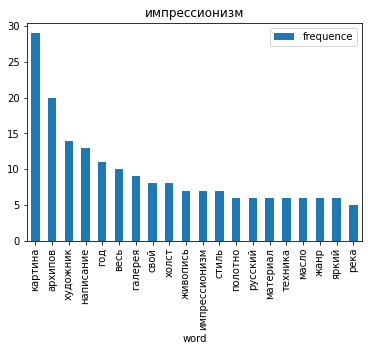

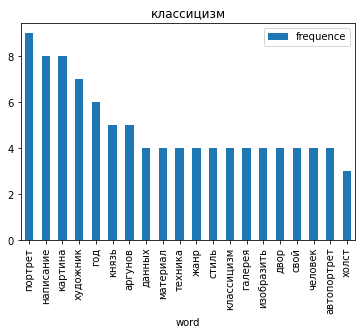

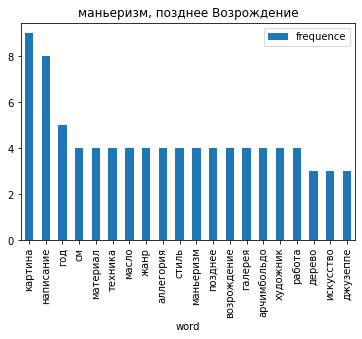

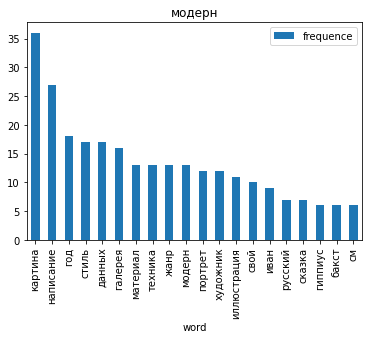

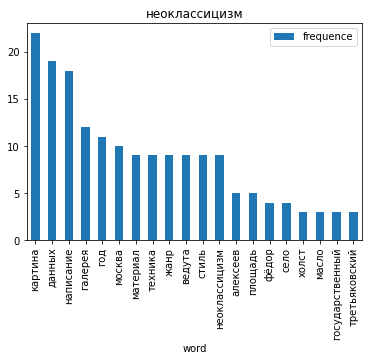

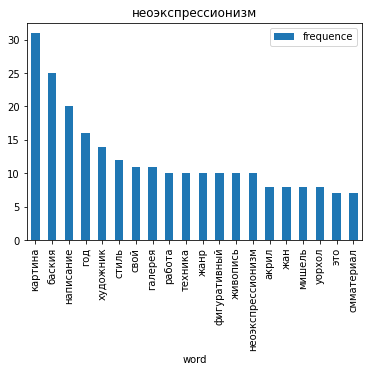

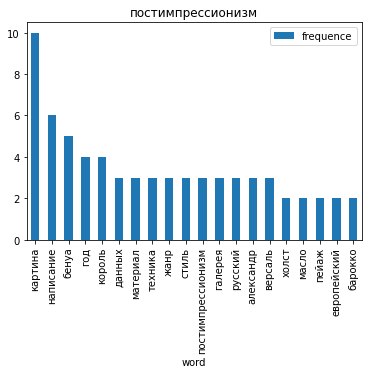

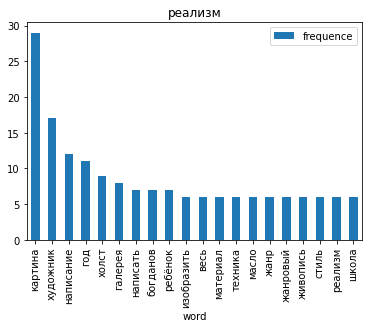

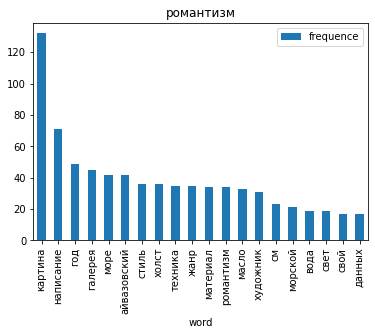

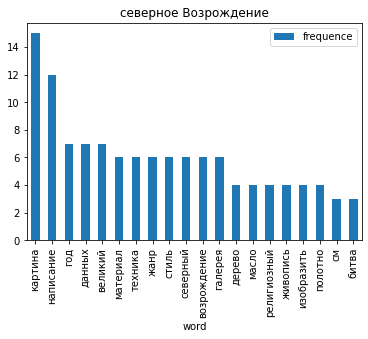

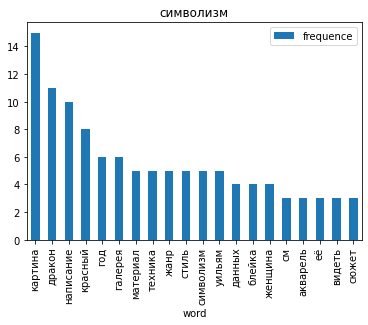

In [ ]:
for style in by_style.index:
  all_words = by_style[style]
  clean_words = [word for word in all_words if word.isalpha()]
  clean_words = [word for word in clean_words if re.search('[а-я]', word)]
  freqs = Counter(clean_words)
  top_20 = freqs.most_common(20)
  freqs_df = pd.DataFrame(top_20)
  freqs_df.columns = ['word', 'frequence']
  freqs_df.plot.bar(x ='word', y = 'frequence', title = style)
  #print(top_20)

импрессионизм :


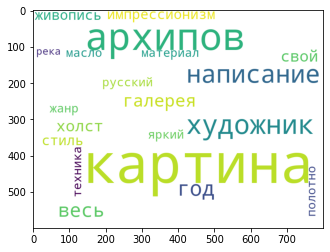

классицизм :


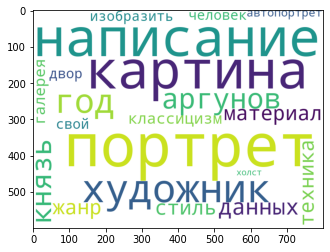

маньеризм, позднее Возрождение :


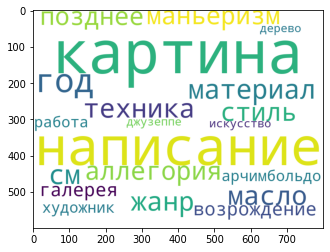

модерн :


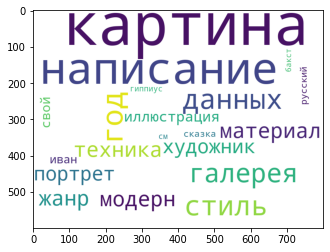

неоклассицизм :


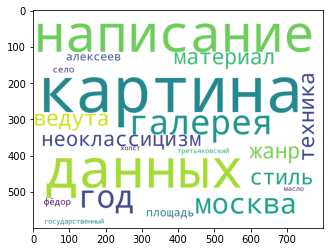

неоэкспрессионизм :


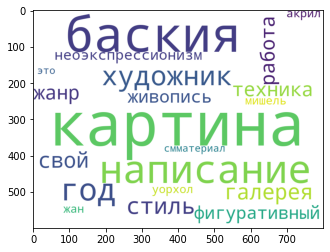

постимпрессионизм :


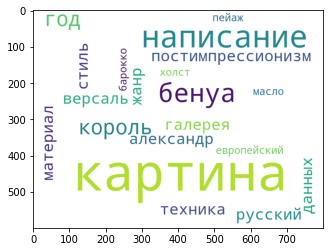

реализм :


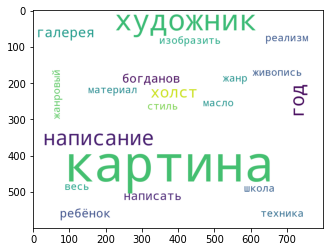

романтизм :


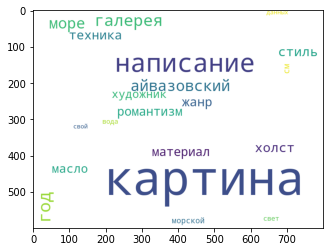

северное Возрождение :


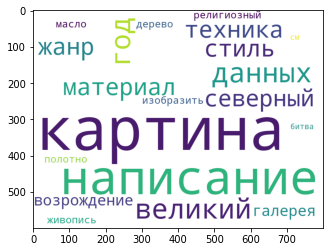

символизм :


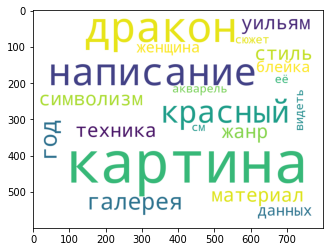

In [ ]:
for style in by_style.index:
  all_words = by_style[style]
  clean_words = [word for word in all_words if word.isalpha()]
  clean_words = [word for word in clean_words if re.search('[а-я]', word)]
  freqs = Counter(clean_words)
  top_20 = freqs.most_common(20)
  print(style, ':')
  wc = WordCloud(background_color='white',
                        width=800,height=600,             
                        relative_scaling=1).generate_from_frequencies(dict(top_20))
  plt.imshow(wc)
  plt.show()